<a href="https://colab.research.google.com/github/PerdomoVergaraFernando/Ecuaciones-Diferenciales-Parciales-2/blob/main/Minimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [117]:
x = sp.symbols('x') #introduciomos una variable
u = sp.Function('u') #Esto es una función

In [118]:
ode =u(x).diff(x,x) + u(x) + x
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) - x)

In [119]:
sol = sp.dsolve(ode, ics={ u(0): 0, u(1): 0 }) # diccionario

In [120]:
sol

Eq(u(x), -x + sin(x)/sin(1))

In [121]:
#Comvertimos en un arreglo de numpy
u_expr = sol.rhs # parte derecha   del so
u_num  = sp.lambdify(x, u_expr,"numpy")


In [122]:
xx = np.linspace(0, 1, 100) #np.linspace() Crea un array de números equiespaciados en un intervalo:
yy = u_num(xx)

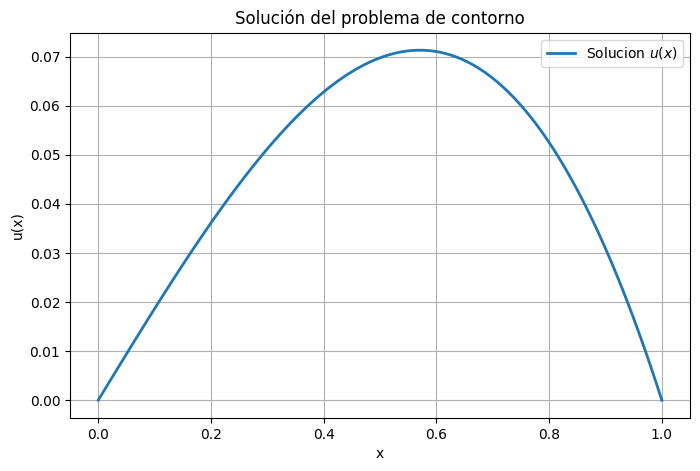

In [123]:
plt.figure(figsize=(8, 5)) #Crea una nueva figura para el gráfico
                            # figsize: (ancho, alto)
plt.plot(xx, yy, label="Solucion $u(x)$", linewidth=2) #Dibuja la solución como una línea
plt.title('Solución del problema de contorno') #Añade un título al gráfico
plt.xlabel('x') #Etiquetan los ejes
plt.ylabel('u(x)') #Etiquetan los ejes
plt.grid() #Añade una cuadrícula al gráfico
plt.legend() #Añade una leyenda al gráfico
plt.show() #Muestra el gráfico en pantalla

In [124]:
a,b = sp.symbols('a  b')

#Funcion de prueba u_n(x) que cumple u(0)=u(1)=0
u_n = a*x*(1-x) + b*x**2*(1-x)


In [125]:
u_n

a*x*(1 - x) + b*x**2*(1 - x)

In [126]:
E = sp.Function ('E') # esto es una funcion

In [127]:
u_n_2 = sp.diff(u_n, x, 2)

E = u_n_2 + u_n +x

In [128]:
E

a*x*(1 - x) + b*x**2*(1 - x) + x - 2*(a + 2*b*x + b*(x - 1))

In [129]:
I = sp.integrate(E**2, (x,0,1))

In [130]:
I

101*a**2/30 + 101*a*b/30 - 11*a/6 + 131*b**2/35 - 19*b/10 + 1/3

In [131]:
dIa = sp.diff(I,a)
dIb = sp.diff(I,b)

In [132]:
print(dIa, "\n", dIb )

101*a/15 + 101*b/30 - 11/6 
 101*a/30 + 262*b/35 - 19/10


In [133]:
soleq = sp.solve([dIa, dIb], [a, b], simplify = True )
soleq

{a: 46161/246137, b: 413/2437}

In [134]:
u_aprox = E.subs(soleq)


In [135]:
u_aprox

413*x**2*(1 - x)/2437 + 46161*x*(1 - x)/246137 - 41*x/2437 - 8896/246137

In [136]:
u_aprox_nf = sp.lambdify(x, u_aprox, "numpy")


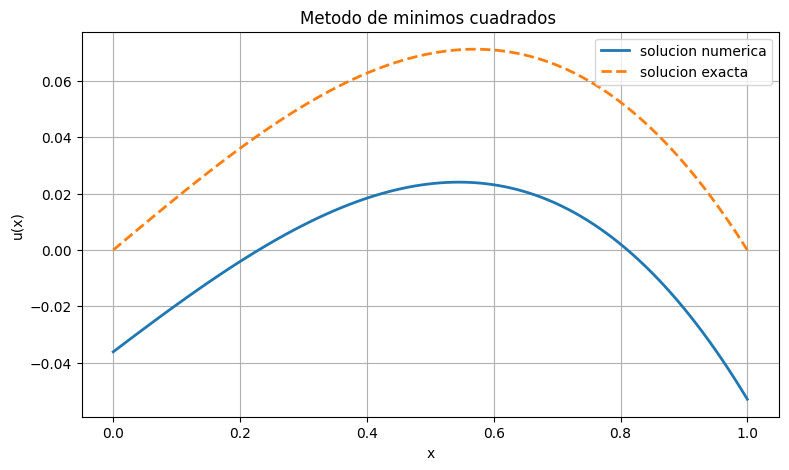

In [138]:
#solucion analitica  y numerica

xx= np.linspace(0,1,100)

plt.figure(figsize=(9,5))
plt.plot(xx, u_aprox_nf(xx), label='solucion numerica', linewidth=2)
plt.plot(xx, yy, "--", label="solucion exacta", linewidth=2 )

plt.title("Metodo de minimos cuadrados ")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid()
plt.legend()
plt.show()
#